<a href="https://colab.research.google.com/github/angayarkannipitchumani/Covid19Visualization/blob/master/covidsymptomscheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import datetime
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from scipy.optimize import curve_fit

IndiaDF=pd.read_csv('/content/corona_tested_individuals_ver_006.english.csv')
IndiaDF.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.



,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,30-04-2020,0,0,0,0,0,negative,None,female,Other
1,30-04-2020,1,0,0,0,0,negative,None,female,Other
2,30-04-2020,0,1,0,0,0,negative,None,male,Other
3,30-04-2020,1,0,0,0,0,negative,None,female,Other
4,30-04-2020,1,0,0,0,0,negative,None,male,Other


To print the datatype

In [56]:
IndiaDF.dtypes

test_date              object
cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
IndiaDF['corona_result']= le.fit_transform(IndiaDF['corona_result'])
IndiaDF['age_60_and_above']=le.fit_transform(IndiaDF['age_60_and_above'])
IndiaDF['test_indication']=le.fit_transform(IndiaDF['test_indication'])

In [58]:
IndiaDF.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [59]:
# All categorical columns
object_cols = [col for col in IndiaDF.columns if IndiaDF[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(IndiaDF[col]) == set(IndiaDF[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'gender']

Categorical columns that will be dropped from the dataset: []


In [60]:
# process columns, apply LabelEncoder to categorical features
from sklearn import preprocessing
for c in good_label_cols:
    lbl = preprocessing.LabelEncoder() 
    lbl.fit(list(IndiaDF[c].values)) 
    IndiaDF[c] = lbl.transform(list(IndiaDF[c].values))
    lbl.fit(list(IndiaDF[c].values)) 
    IndiaDF[c] = lbl.transform(list(IndiaDF[c].values))

In [61]:

Y = IndiaDF['corona_result']
X = IndiaDF.drop(['corona_result','test_date','gender'],axis = 1)

In [62]:
X.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
age_60_and_above       0
test_indication        0
dtype: int64

In [63]:
print('shape of X is:',X.shape)
print('Shape of Y is:',Y.shape)

shape of X is: (278848, 7)
Shape of Y is: (278848,)


In [ ]:
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
0,0,0,0,0,0,1,2
1,1,0,0,0,0,1,2
2,0,1,0,0,0,1,2
3,1,0,0,0,0,1,2
4,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
263822,0,0,0,0,0,0,2
263823,0,0,0,0,0,0,2
263824,0,0,0,0,0,0,2
263825,0,0,0,0,0,0,2


Accuracy is:  0.9552447552447553


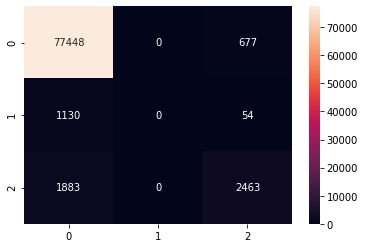

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9552328013866476


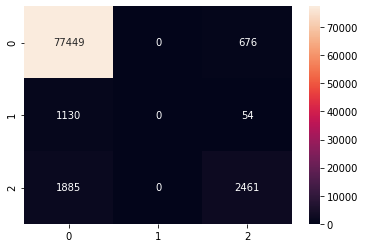

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_dt = tree.DecisionTreeClassifier()     
clf_dt = clf_dt.fit(x_train,y_train)
y_pred = clf_dt.predict(x_test)
ac = accuracy_score(y_test,clf_dt.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_dt.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [66]:
import pickle
pickle.dump(clf_dt, open('final_prediction.pickle', 'wb'))

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
!pip install WSGIServer

In [ ]:
!pip install gevent

     |████████████████████████████████| 5.6MB 5.4MB/s 
     |████████████████████████████████| 256kB 37.3MB/s 


In [67]:
'''from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello(): 
  
  return "Hello World"

import portpicker
port = portpicker.pick_unused_port()
from google.colab import output
output.serve_kernel_port_as_window(port)

from gevent.pywsgi import WSGIServer
host='localhost'
app_server = WSGIServer((host, port), app)
app_server.serve_forever()
output.serve_kernel_port_as_iframe(port)'''




'from flask import Flask\napp = Flask(__name__)\n\n@app.route("/")\ndef hello(): \n  \n  return "Hello World"\n\nimport portpicker\nport = portpicker.pick_unused_port()\nfrom google.colab import output\noutput.serve_kernel_port_as_window(port)\n\nfrom gevent.pywsgi import WSGIServer\nhost=\'localhost\'\napp_server = WSGIServer((host, port), app)\napp_server.serve_forever()\noutput.serve_kernel_port_as_iframe(port)'

In [ ]:
!pip install pydantic

     |████████████████████████████████| 10.1MB 5.3MB/s 


In [79]:
from pydantic import BaseModel

class Covid(BaseModel):
    fever: int 
    sour: int
    headache: int
    i:int
    j:int
    k:int
    l:int
    class Config:
        schema_extra = {
            "example": {
                "fever": 1, 
                "sour": 1, 
                "headache": 1,
                "i": 0,
                "j": 0,
                "k": 0,
                "l": 1
            }
        }

In [ ]:
!pip install fastapi

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 61kB 3.2MB/s 


In [80]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = pickle.load(open("/content/final_prediction.pickle", "rb"))

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_covid_category(data: Covid):
    received = data.dict()
    fever = received['fever']
    sour = received['sour']
    headache = received['headache']
    i= received['i']
    j = received['j']
    k = received['k']
    l = received['l']
    
    pred = model.predict([[fever,sour,headache,i,j,k,l]]).tolist()[0]
    if(pred==0):
      pred_name='negative'
    else:
      pred_name='positive'

    
    return {'prediction': pred_name}

In [ ]:
!pip install colabcode

     |████████████████████████████████| 8.3MB 4.2MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 747kB 35.5MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 389kB 33.5MB/s 
     |████████████████████████████████| 430kB 29.2MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 122kB 38.1MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=935573059c76ab31fdf6c0ffb4c64fde9b6afb9eb994c4f1c5650096c48d7d00
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1

In [81]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [82]:
server.run_app(app=app)

Public URL: NgrokTunnel: "http://2ea9d67210f8.ngrok.io" -> "http://localhost:10000"


INFO:     Started server process [65]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:10000 (Press CTRL+C to quit)


INFO:     183.82.189.11:0 - "GET / HTTP/1.1" 200 OK
INFO:     183.82.189.11:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     183.82.189.11:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     183.82.189.11:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     183.82.189.11:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [65]


In [54]:

  
  
import portpicker
port = portpicker.pick_unused_port()
from google.colab import output
output.serve_kernel_port_as_window(port)

from gevent.pywsgi import WSGIServer
host='localhost'

app_server = WSGIServer((host, port), app)
app_server.serve_forever()

<IPython.core.display.Javascript object>

KeyboardInterrupt
2021-06-02T16:46:53Z


KeyboardInterrupt: ignored

The accuracy for DecisionTree and Random Forest is: 0.945717530332915
The accuracy for DecisionTree and Random Forest is: 0.945717530332915


0.9552328013866476


,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
0,0,0,0,0,0,1,2
1,1,0,0,0,0,1,2
2,0,1,0,0,0,1,2
3,1,0,0,0,0,1,2
4,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,2
278844,0,0,0,0,0,1,2
278845,0,0,0,0,0,1,1
278846,0,0,0,0,0,1,2


X=[0, 0, 0, 0, 0, 0, 2], Predicted=0


In [ ]:
!pip install CORS

     |████████████████████████████████| 2.3MB 6.7MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
     |████████████████████████████████| 5.6MB 21.3MB/s 
     |████████████████████████████████| 256kB 27.8MB/s 


In [ ]:
!pip install flask_restful

     |████████████████████████████████| 61kB 5.1MB/s 


In [ ]:
from flask import Flask
from flask_restful import reqparse, abort, Api, Resource
import pickle
import numpy as np

app = Flask(__name__)
api = Api(app)
# create new model object


# load trained classifier
clf_path = ''
with open(clf_path, 'rb') as f:
    model = pickle.load(f)
model.fit(x_train,y_train)

Xnew=[[1,1,1,0,0,0,2]]
pred=model.predict(Xnew)
print('predicted result',pred)

predicted result [2]


In [ ]:
f

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [ ]:
class PredictCovid(Resource):
    def get(self):
        # use parser and find the user's query
        
        pred=model.predict(Xnew)
        pred_proba = model.predict_proba(Xnew)
        # Output 'Negative' or 'Positive' along with the score
        if pred == 0:
            pred_text = 'Negative'
        elif pred == 1:
            pred_text = 'Positive Mild'
        else:
             pred_text = 'Positive Severe'
            
        # round the predict proba value and set to new variable
        confidence = round(pred_proba[0], 3)
        # create JSON object
        output = {'prediction': pred_text, 'confidence': confidence}
        
        return output

In [ ]:
api.add_resource(PredictCovid, '/')
  
# example of another endpoint
api.add_resource(PredictCovid, '/precited')

AssertionError: ignored